In [1]:
import math
import random
import torch
import numpy as np
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import copy
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm



from scipy.interpolate import griddata

D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#global veriable 
Uniform_low_bound=0
Uniform_up_bound=1
Agent_number_n=10

number_of_groups=2

Normal_loc=0.5
Normal_scale=0.2
Normal_loc1=0.15
Normal_loc2=0.85
Normal_scale1=0.1
Normal_scale2=0.1
Distribution_number=10000


[0.06925207 0.35707063 0.81282955 0.42770483 0.59985444 0.72816128
 0.82122761 0.76051512 0.00714328 0.42025683]
[[0.97347557 0.95538345 0.42462553 ... 0.63650234 0.76108474 0.18802993]
 [0.23783677 0.66459076 0.3741999  ... 0.21199017 0.93517469 0.31604711]
 [0.45861424 0.9552804  0.6050889  ... 0.13753772 0.24868187 0.3719452 ]
 ...
 [0.36591559 0.68718776 0.09936429 ... 0.96846719 0.54219851 0.25576897]
 [0.2871301  0.10456257 0.08067045 ... 0.14154302 0.6780894  0.82744162]
 [0.19329161 0.93503464 0.27339873 ... 0.50301997 0.57779921 0.1298519 ]]
[0.97347557 0.23783677 0.45861424 ... 0.36591559 0.2871301  0.19329161]


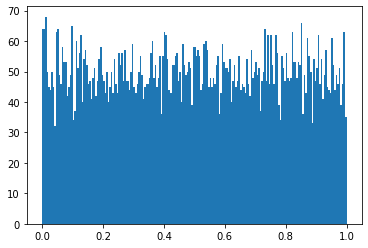

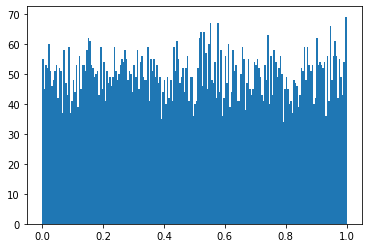

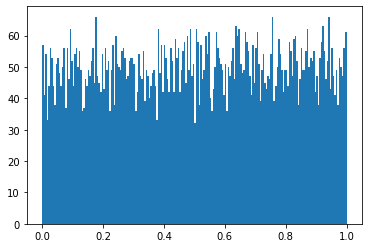

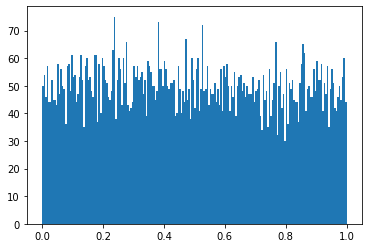

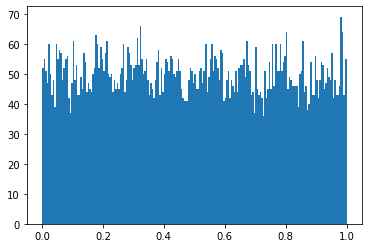

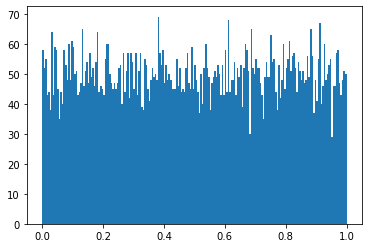

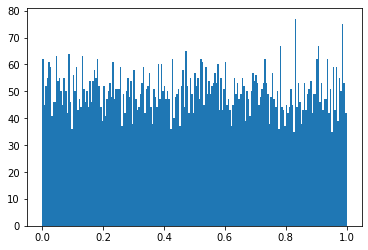

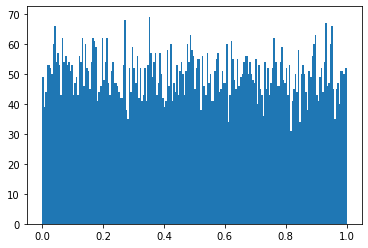

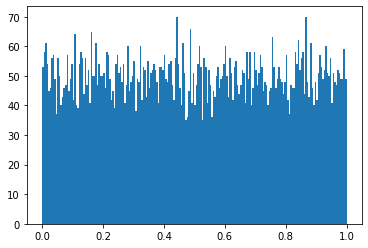

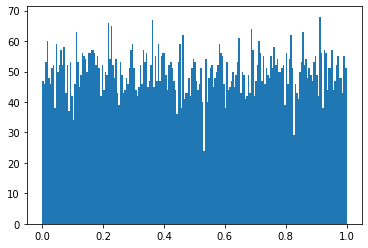

1000
9000


In [3]:
seed = 7
np.random.seed(seed)
#exec(open('distribution/twopeak.py').read())
exec(open('distribution/uniform.py').read())
#exec(open('distribution/normal.py').read())
X_train,  X_test = train_test_split(value_list, test_size=0.9, random_state=seed)

dataset_size = len(X_train)
print(dataset_size)
#print(X_train[:100])
print(len(X_test))
#run_cs()

In [4]:


def cost_sharing_with_deadline(test,t_c,target):
    temp_max_delay_list=[0 for i in range(len(test))]
    temp_sum_delay=0
    result=False
    for k in range(len(test),0,-1):
        count=0;
        delay=0;
        for ii in range(len(test)):
            item= test[ii]
            if(item+1e-9>=target/k):
                count+=1;
            else:
                delay+=t_c[ii];
                temp_max_delay_list[ii]=t_c[ii]
            
        if(count>=k):
            temp_sum_delay+=delay;
            result=True
            break;
        if(k<=1):
            #print(test,number_n);
            temp_max_delay_list=t_c
            temp_sum_delay=sum(t_c);
            result=False
            
    return temp_max_delay_list,temp_sum_delay,result



#Cost Sharing
def run_cs(deadline_list):
    sum_delay=0
    max_delay=0
    test_number=0
    for i in range(len(X_test)):
        test_number+=1
        temp_max_delay=0
        temp_delay=0
        test = copy.deepcopy(X_test[i])
        #test_change = copy.deepcopy(X_test[i]);
        test_change = []

        for j in range(len(test)):
            test_change.append(test[j] * deadline_list[j])
            
        
        temp_max_delay_list,temp_sum_delay,judge1 = cost_sharing_with_deadline(test_change,
                        copy.deepcopy(deadline_list),1.0)
        for j in range(len(test_change)):
            test_i = copy.deepcopy(test_change);
            test_i = np.delete(test_i, j)
            
            deadline_i = copy.deepcopy(deadline_list);
            deadline_i = np.delete(deadline_i, j)
            
            temp_max_delay_i_list,temp_sum_delay_i,judge_i = cost_sharing_with_deadline(test_i,
                        deadline_i,1.0)
            
            if(judge_i==False):
                temp_sum_delay += (1.0-deadline_list[j])
                temp_max_delay_list[j] += (1.0-deadline_list[j])
                
            
        
        max_delay+=max(temp_max_delay_list)
        
        sum_delay+=temp_sum_delay
        
    print("deadline: ",deadline_list[0])
    print("sum_delay: ",sum_delay/test_number)
    print("max_delay: ",max_delay/test_number)
    print()
    return sum_delay/test_number
    
    


In [ ]:
devided=50

for deadline in range(devided+1):
    deadline_free = (devided-deadline) /devided
    deadline = (deadline) /devided
    deadline_list = [deadline for i in range(Agent_number_n)]
    run_cs(deadline_list)  # deadline=0 free get; deadline=1 full payment 
    print()
    

deadline:  0.0
sum_delay:  10.0
max_delay:  1.0


deadline:  0.02
sum_delay:  10.000000000000002
max_delay:  1.0


deadline:  0.04
sum_delay:  10.0
max_delay:  1.0


deadline:  0.06
sum_delay:  9.999999999999998
max_delay:  1.0


deadline:  0.08
sum_delay:  10.0
max_delay:  1.0


deadline:  0.1
sum_delay:  10.000000000000002
max_delay:  1.0


deadline:  0.12
sum_delay:  10.000000000000002
max_delay:  1.0


deadline:  0.14
sum_delay:  9.999844444444445
max_delay:  0.9999844444444446


deadline:  0.16
sum_delay:  9.997435555555555
max_delay:  0.9998000000000001


deadline:  0.18
sum_delay:  9.98773111111111
max_delay:  0.9991555555555554


deadline:  0.2
sum_delay:  9.938777777777771
max_delay:  0.9960444444444451


deadline:  0.22
sum_delay:  9.778442222222202
max_delay:  0.9856622222222209


deadline:  0.24
sum_delay:  9.45406666666666
max_delay:  0.963617777777787


deadline:  0.26
sum_delay:  8.949615555555562
max_delay:  0.928524444444432


deadline:  0.28
sum_delay:  8.277266666666

In [ ]:
#Cost Sharing
def run_cs_pure():
    sum_delay=0
    max_delay=0
    test_number=0
    for i in range(len(X_test)):
        test_number+=1
        temp_max_delay=0
        temp_delay=0
        test=copy.deepcopy(X_test[i]);

        for k in range(Agent_number_n,0,-1):
            count=0;
            delay=0;
            for item in test:
                if(item>=1.0/k):
                    count+=1;
                else:
                    delay+=1;
            if(count>=k):
                temp_delay=delay;
                if temp_delay != 0 :
                    temp_max_delay = 1
                break;
            if(k<=1):
                #print(test);
                temp_delay=Agent_number_n;
                temp_max_delay=1
        
        
        sum_delay+=temp_delay
        max_delay+=temp_max_delay
                
    print("max_delay",max_delay/test_number);
    print("sum_delay",sum_delay/test_number);
    
run_cs_pure()